In [2]:
import Args
import functions
import agents
import importlib

importlib.reload(Args)
importlib.reload(functions)
importlib.reload(agents)

from Args import *
from functions import *
from agents import *

import pickle

#import gymnasium as gym

args=Args_()

In [46]:
models_name=["Stoch_Q_learning_model"]
results={}
for name in models_name:
    results[f"reward_{name}"]=[]
    results[f"acu_reward_{name}"]=[]
    results[f"episodes-length_{name}"]=[]

for i in range(10):
    Stoch_Q_Learning_model=Stoch_QLearningAgent(args)

    models=[Stoch_Q_Learning_model]
    
    for model,name in zip(models,models_name):
        print(i,name)
        reward,acu_reward,length=model.train()
        results[f"reward_{name}"].append(reward)
        results[f"acu_reward_{name}"].append(acu_reward)
        results[f"episodes-length_{name}"].append(length)

avg_rewards=[]
avg_acu_rewards=[]
for name in models_name:
    reward=np.average(np.array(results[f"reward_{name}"]),axis=0)
    acu_reward=np.average(np.array(results[f"acu_reward_{name}"]),axis=0)
    avg_rewards.append(reward)
    avg_acu_rewards.append(acu_reward)

0 Stoch_Q_learning_model
1 Stoch_Q_learning_model
2 Stoch_Q_learning_model
3 Stoch_Q_learning_model
4 Stoch_Q_learning_model
5 Stoch_Q_learning_model
6 Stoch_Q_learning_model
7 Stoch_Q_learning_model
8 Stoch_Q_learning_model
9 Stoch_Q_learning_model


In [47]:

#with open('Stoch_Q_learning_C=2_M=0.pkl', 'wb') as f:
    #pickle.dump(results, f)

In [1]:
import pickle
with open('Stoch_Q_learning_C=2_M=0.pkl', 'rb') as f:
    Stoch_Q_learning_C2_M0 = pickle.load(f)
with open('Stoch_Q_learning_C=2_M=1.pkl', 'rb') as f:
    Stoch_Q_learning_C2_M1 = pickle.load(f)
with open('Stoch_Q_learning_C=2_M=2.pkl', 'rb') as f:
    Stoch_Q_learning_C2_M2 = pickle.load(f)
with open('Stoch_Q_learning_C=3_M=2.pkl', 'rb') as f:
    Stoch_Q_learning_C3_M2 = pickle.load(f)
with open('Q_learning_Vs_Stoch_Q_learning_alpha_005.pkl', 'rb') as f:
    Q_learning_d = pickle.load(f)

In [2]:
Q_learning_d.keys()
tmp={}
for name in ['reward_Q_Learning_model', 'acu_reward_Q_Learning_model', 'episodes-length_Q_Learning_model']:
    tmp[name]=[]

for name in ['reward_Q_Learning_model', 'acu_reward_Q_Learning_model', 'episodes-length_Q_Learning_model']:
    for i in range(len(Q_learning_d[name])):
        tmp[name].append(Q_learning_d[name][i][:100_000])


In [3]:
d={}
for key in Stoch_Q_learning_C2_M0.keys():
    d[f"{key}_C2_M0"]=Stoch_Q_learning_C2_M0[key]
for key in Stoch_Q_learning_C2_M1.keys():
    d[f"{key}_C2_M1"]=Stoch_Q_learning_C2_M1[key]
for key in Stoch_Q_learning_C2_M2.keys():
    d[f"{key}_C2_M2"]=Stoch_Q_learning_C2_M2[key]
for key in Stoch_Q_learning_C3_M2.keys():
    d[f"{key}_C3_M2"]=Stoch_Q_learning_C3_M2[key]
for key in tmp.keys():
    d[key]=tmp[key]


In [4]:
import numpy as np
models_name=['Q_Learning_model','Stoch_Q_learning_model_C2_M0', 'Stoch_Q_learning_model_C2_M1' , 'Stoch_Q_learning_model_C2_M2', 'Stoch_Q_learning_model_C3_M2']
avg_rewards=[]
avg_acu_rewards=[]
for name in models_name:
    reward=np.average(np.array(d[f"reward_{name}"]),axis=0)
    acu_reward=np.average(np.array(d[f"acu_reward_{name}"]),axis=0)
    avg_rewards.append(reward)
    avg_acu_rewards.append(acu_reward)

In [5]:
from functions import *

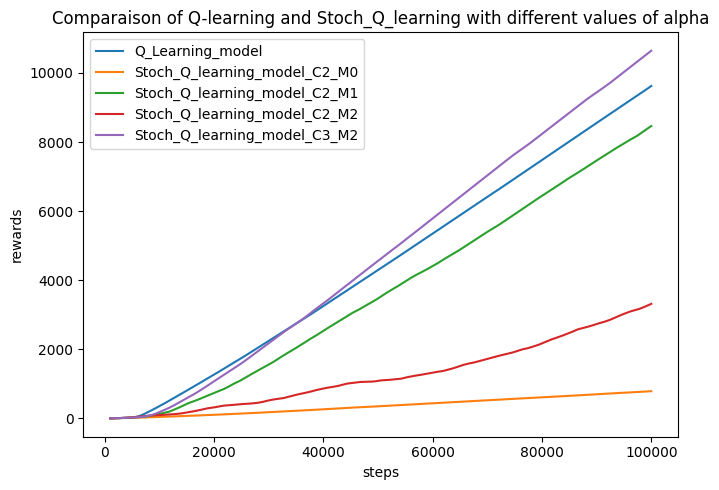

In [6]:
one_plot_1(avg_acu_rewards,models_name,1000,title="Comparaison of Q-learning and Stoch_Q_learning with different values of alpha")

In [7]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]
results={}
for name in models_name:
    results[f"reward_{name}"]=[]
    results[f"acu_reward_{name}"]=[]
    results[f"episodes-length_{name}"]=[]
for i in range(10):
    Random_model=RandomAgent(args)

    Q_Learning_model=QLearningAgent(args)
    Stoch_Q_Learning_model=Stoch_QLearningAgent(args)

    Double_Q_Learning_model=DoubleQLearningAgent(args)
    Stoch_Double_Q_Learning_model=Stoch_DoubleQLearningAgent(args)

    Sarsa_model=SARSAAgent(args)
    Stoch_Sarsa_model=Stoch_SARSAAgent(args)

    models=[Random_model,Q_Learning_model,Stoch_Q_Learning_model,Double_Q_Learning_model,Stoch_Double_Q_Learning_model,Sarsa_model,Stoch_Sarsa_model]
    
    for model,name in zip(models,models_name):
        print(i,name)
        reward,acu_reward,length=model.train()
        results[f"reward_{name}"].append(reward)
        results[f"acu_reward_{name}"].append(acu_reward)
        results[f"episodes-length_{name}"].append(length)
        
avg_rewards=[]
avg_acu_rewards=[]
for name in models_name:
    reward=np.average(np.array(results[f"reward_{name}"]),axis=0)
    acu_reward=np.average(np.array(results[f"acu_reward_{name}"]),axis=0)
    avg_rewards.append(reward)
    avg_acu_rewards.append(acu_reward)

0 Random_model
0 Q_Learning_model
0 Stoch_Q_Learning_model
0 Double_Q_Learning_model
0 Stoch_Double_Q_Learning_model
0 Sarsa_model
0 Stoch_Sarsa_model
1 Random_model
1 Q_Learning_model
1 Stoch_Q_Learning_model
1 Double_Q_Learning_model
1 Stoch_Double_Q_Learning_model
1 Sarsa_model
1 Stoch_Sarsa_model
2 Random_model
2 Q_Learning_model
2 Stoch_Q_Learning_model
2 Double_Q_Learning_model
2 Stoch_Double_Q_Learning_model
2 Sarsa_model
2 Stoch_Sarsa_model
3 Random_model
3 Q_Learning_model
3 Stoch_Q_Learning_model
3 Double_Q_Learning_model
3 Stoch_Double_Q_Learning_model
3 Sarsa_model
3 Stoch_Sarsa_model
4 Random_model
4 Q_Learning_model
4 Stoch_Q_Learning_model
4 Double_Q_Learning_model
4 Stoch_Double_Q_Learning_model
4 Sarsa_model
4 Stoch_Sarsa_model
5 Random_model
5 Q_Learning_model
5 Stoch_Q_Learning_model
5 Double_Q_Learning_model
5 Stoch_Double_Q_Learning_model
5 Sarsa_model
5 Stoch_Sarsa_model
6 Random_model
6 Q_Learning_model
6 Stoch_Q_Learning_model
6 Double_Q_Learning_model
6 Stoch_D

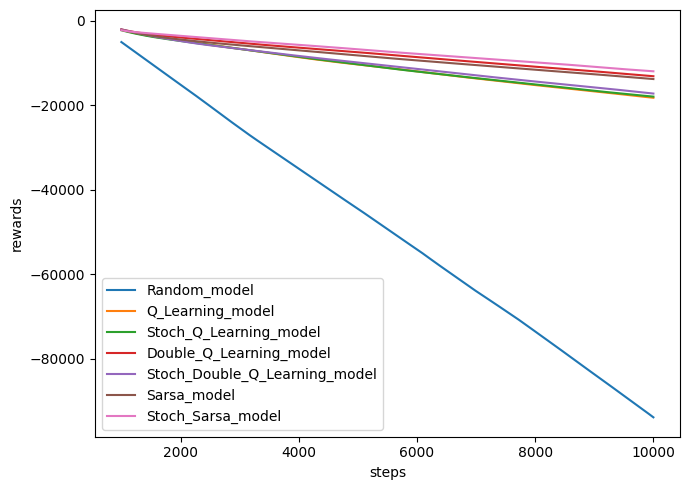

In [8]:
one_plot_1(avg_acu_rewards,models_name,1000)

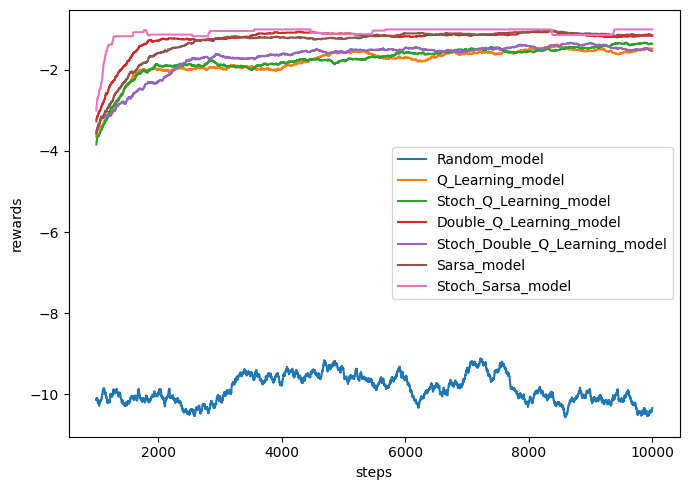

In [12]:
one_plot_1(avg_rewards,models_name,1000)

In [59]:
models_name=["Double_Q_Learning_model","Stoch_Double_Q_learning_model"]
results={}
for name in models_name:
    results[f"reward_{name}"]=[]
    results[f"acu_reward_{name}"]=[]
    results[f"episodes-length_{name}"]=[]

for i in range(10):
    Double_Q_Learning_model=DoubleQLearningAgent(args)
    Stoch_Double_Q_Learning_model=Stoch_DoubleQLearningAgent(args)

    models=[Double_Q_Learning_model,Stoch_Double_Q_Learning_model]
    
    for model,name in zip(models,models_name):
        print(i,name)
        reward,acu_reward,length=model.train()
        results[f"reward_{name}"].append(reward)
        results[f"acu_reward_{name}"].append(acu_reward)
        results[f"episodes-length_{name}"].append(length)

avg_rewards=[]
avg_acu_rewards=[]
for name in models_name:
    reward=np.average(np.array(results[f"reward_{name}"]),axis=0)
    acu_reward=np.average(np.array(results[f"acu_reward_{name}"]),axis=0)
    avg_rewards.append(reward)
    avg_acu_rewards.append(acu_reward)

0 Double_Q_Learning_model
0 Stoch_Double_Q_learning_model
1 Double_Q_Learning_model
1 Stoch_Double_Q_learning_model
2 Double_Q_Learning_model
2 Stoch_Double_Q_learning_model
3 Double_Q_Learning_model
3 Stoch_Double_Q_learning_model
4 Double_Q_Learning_model
4 Stoch_Double_Q_learning_model
5 Double_Q_Learning_model
5 Stoch_Double_Q_learning_model
6 Double_Q_Learning_model
6 Stoch_Double_Q_learning_model
7 Double_Q_Learning_model
7 Stoch_Double_Q_learning_model
8 Double_Q_Learning_model
8 Stoch_Double_Q_learning_model
9 Double_Q_Learning_model
9 Stoch_Double_Q_learning_model


In [60]:
import pickle
with open('Double_Q_learning_Vs_Stoch_Double_Q_learning.pkl', 'wb') as f:
    pickle.dump(results, f)

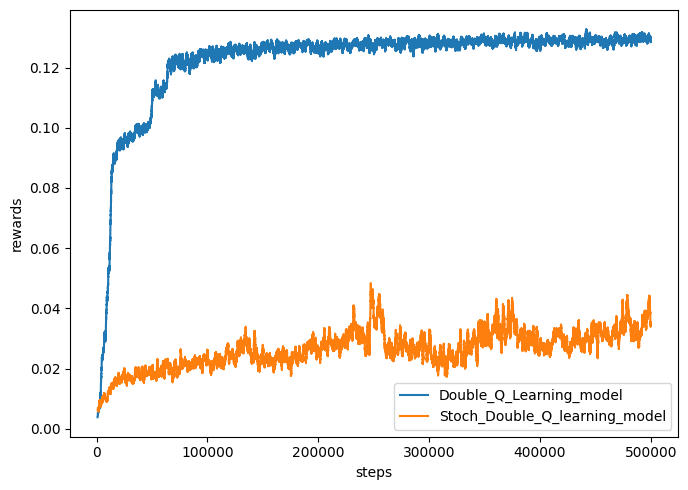

In [78]:
one_plot_1(avg_rewards,models_name,1000)

In [79]:
#import pickle
#with open('Q_learning_Vs_Stoch_Q_learning.pkl', 'wb') as f:
    #pickle.dump(results, f)
#with open('Q_learning_Vs_Stoch_Q_learning.pkl', 'rb') as f:
    #loaded_dict = pickle.load(f)

In [75]:
length_of_episodes=[]
for name in models_name:
    length_for_model=[]
    for data in results[f"episodes-length_{name}"]:
        tmp=epi_length_convert(data)
        length_for_model.append(tmp)
    length_of_episodes.append(length_for_model)

In [76]:
import matplotlib.pyplot as plt

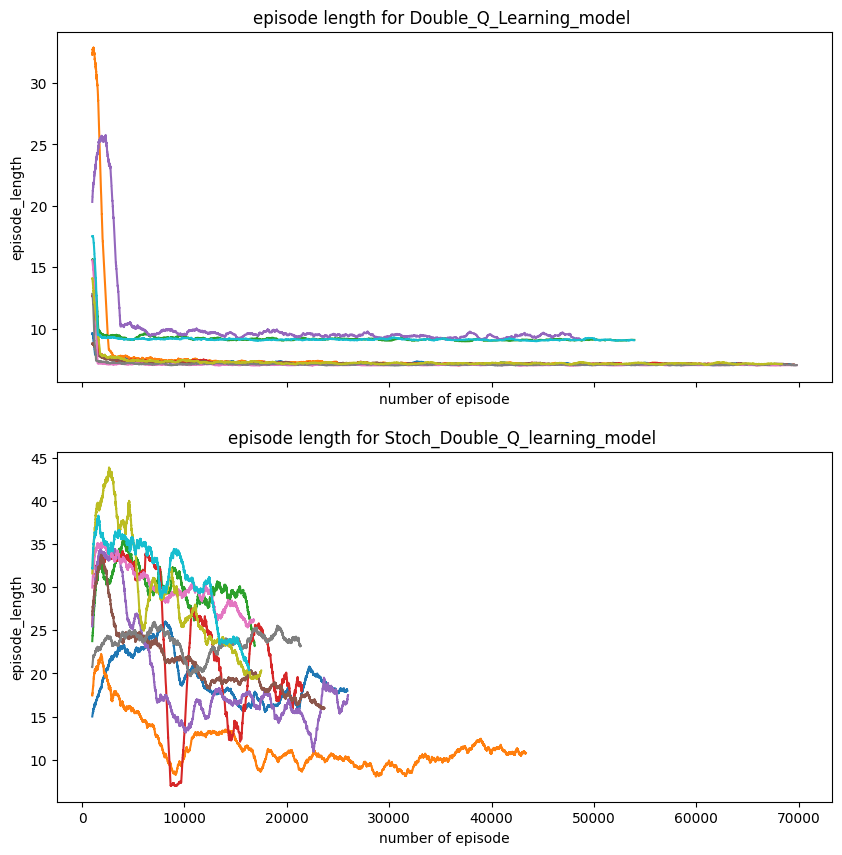

In [77]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
window_size=1000
fig,axs=plt.subplots(2,1,figsize=(10,10),sharex=True)
for i in range(len(length_of_episodes)):
    for data in length_of_episodes[i]:
        tmp=moving_average(data,window_size)
        axs[i].plot(np.arange(window_size - 1, len(data)), tmp, label='Moving Average')
        #axs[i].plot(data)
        axs[i].set_ylabel("episode_length")
        axs[i].set_xlabel("number of episode")
        axs[i].set_title(f"episode length for {models_name[i]} ")

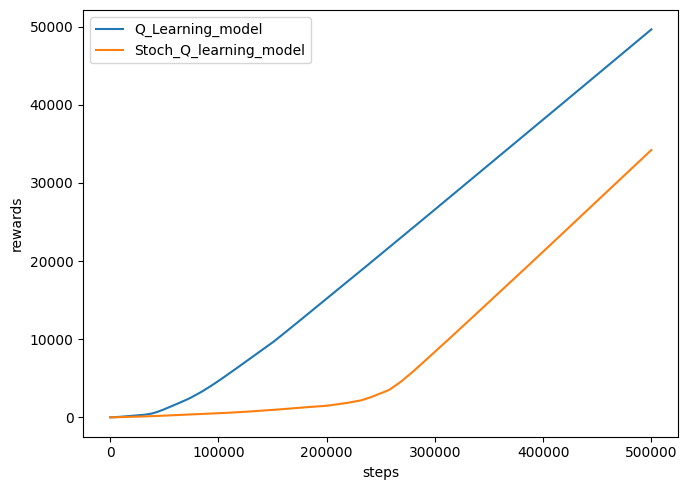

In [21]:
one_plot_1(avg_acu_rewards,models_name,100)

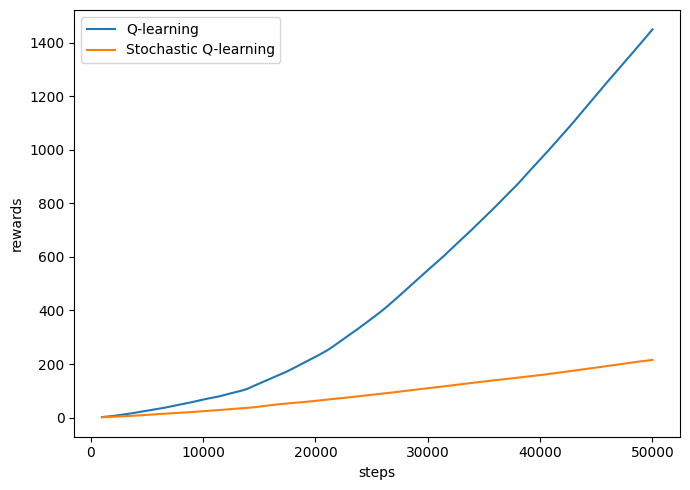

In [173]:
one_plot_1(avg_acu_rewards,["Q-learning","Stochastic Q-learning"],1000)
# alpha of stoch q learning from the function

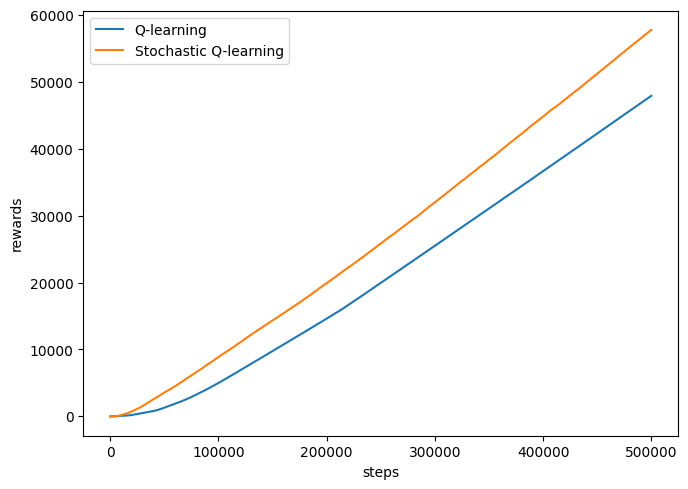

In [165]:
one_plot_1(avg_acu_rewards,["Q-learning","Stochastic Q-learning"],1)
# alpha of stoch q learning alpha=0.05

0 Random_model
0 Q_Learning_model
0 Stoch_Q_Learning_model
0 Double_Q_Learning_model
0 Stoch_Double_Q_Learning_model
0 Sarsa_model
0 Stoch_Sarsa_model


In [17]:
avg_rewards=[]
avg_acu_rewards=[]
for name in models_name:
    reward=np.average(np.array(results[f"reward_{name}"]),axis=0)
    acu_reward=np.average(np.array(results[f"acu_reward_{name}"]),axis=0)
    avg_rewards.append(reward)
    avg_acu_rewards.append(acu_reward)

In [25]:
acu_reward=np.average(np.array(results[f"acu_reward_Sarsa_model"]),axis=0)

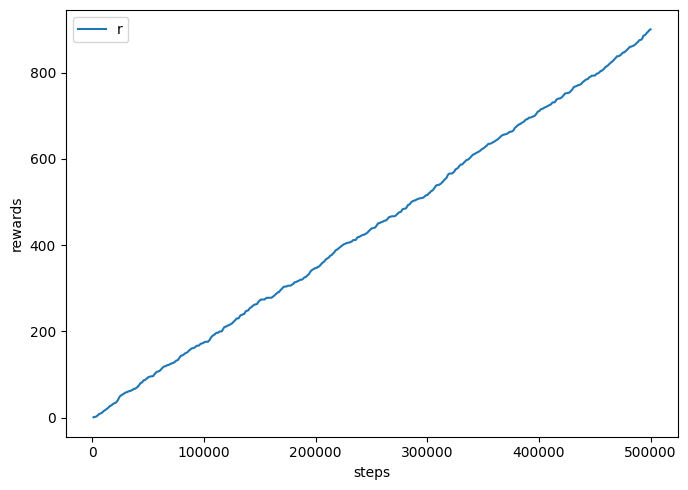

In [51]:
one_plot_1([avg_acu_rewards[0]],"random",1000)

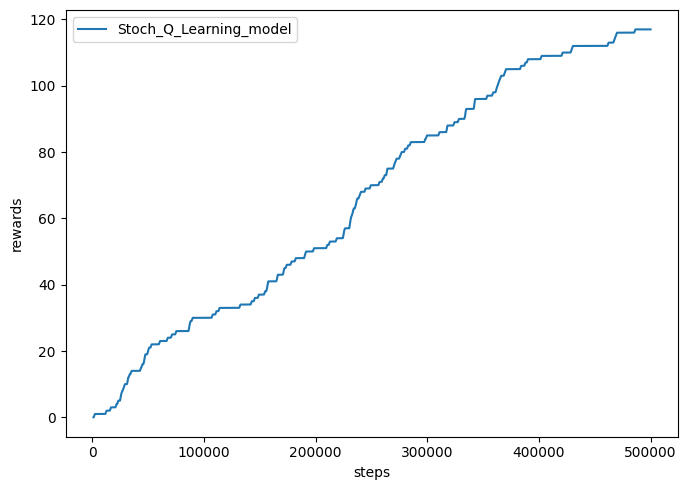

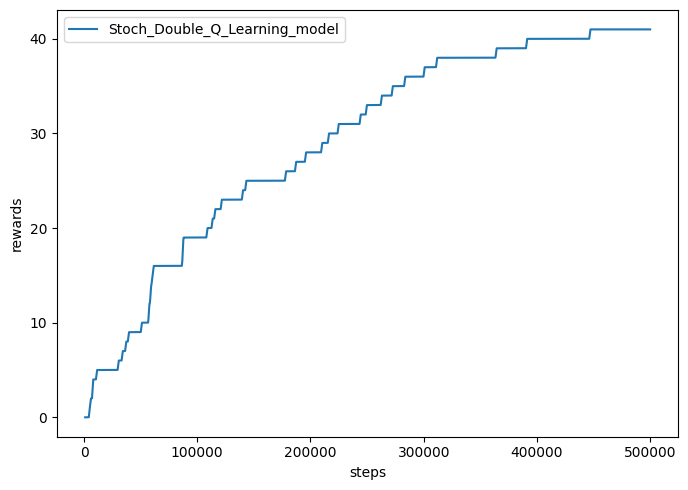

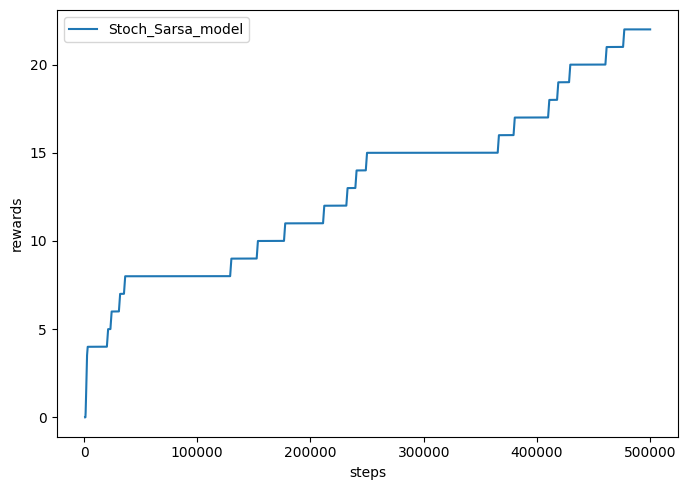

In [52]:
for i in range(3):
    one_plot_1(avg_acu_rewards[i*2+2:i*2+3],models_name[i*2+2:i*2+3],1000)

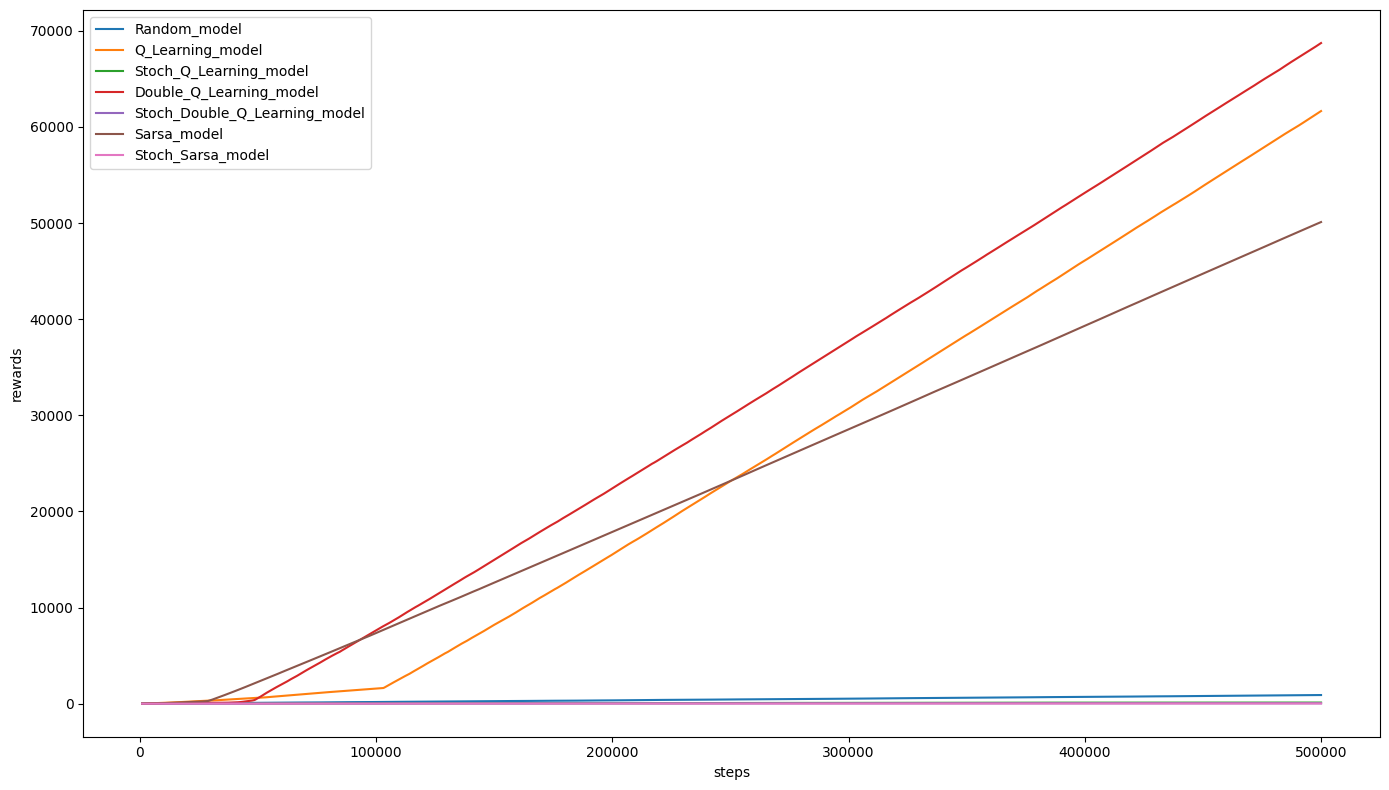

In [43]:
one_plot_1(avg_acu_rewards,models_name,1000)

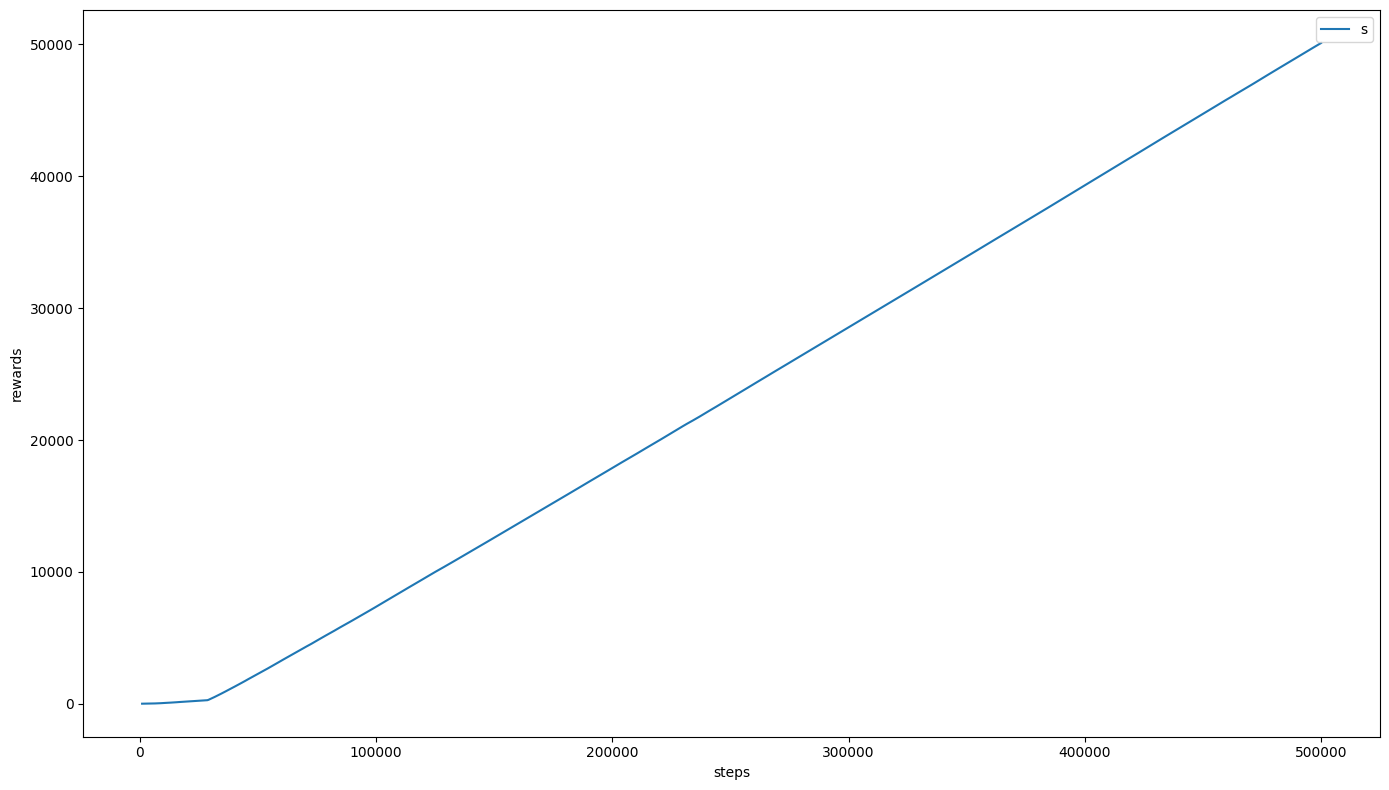

In [26]:
one_plot_1([acu_reward],"sarsastoch",1000)

In [30]:
avg_acu_rewards

[array([  0.,   0.,   0., ..., 902., 902., 902.]),
 array([    0.,     0.,     0., ..., 61732., 61732., 61733.]),
 array([  0.,   0.,   0., ..., 117., 117., 117.]),
 array([    0.,     0.,     0., ..., 68802., 68802., 68803.]),
 array([ 0.,  0.,  0., ..., 41., 41., 41.]),
 array([    0.,     0.,     0., ..., 50164., 50164., 50164.]),
 array([ 0.,  0.,  0., ..., 22., 22., 22.])]

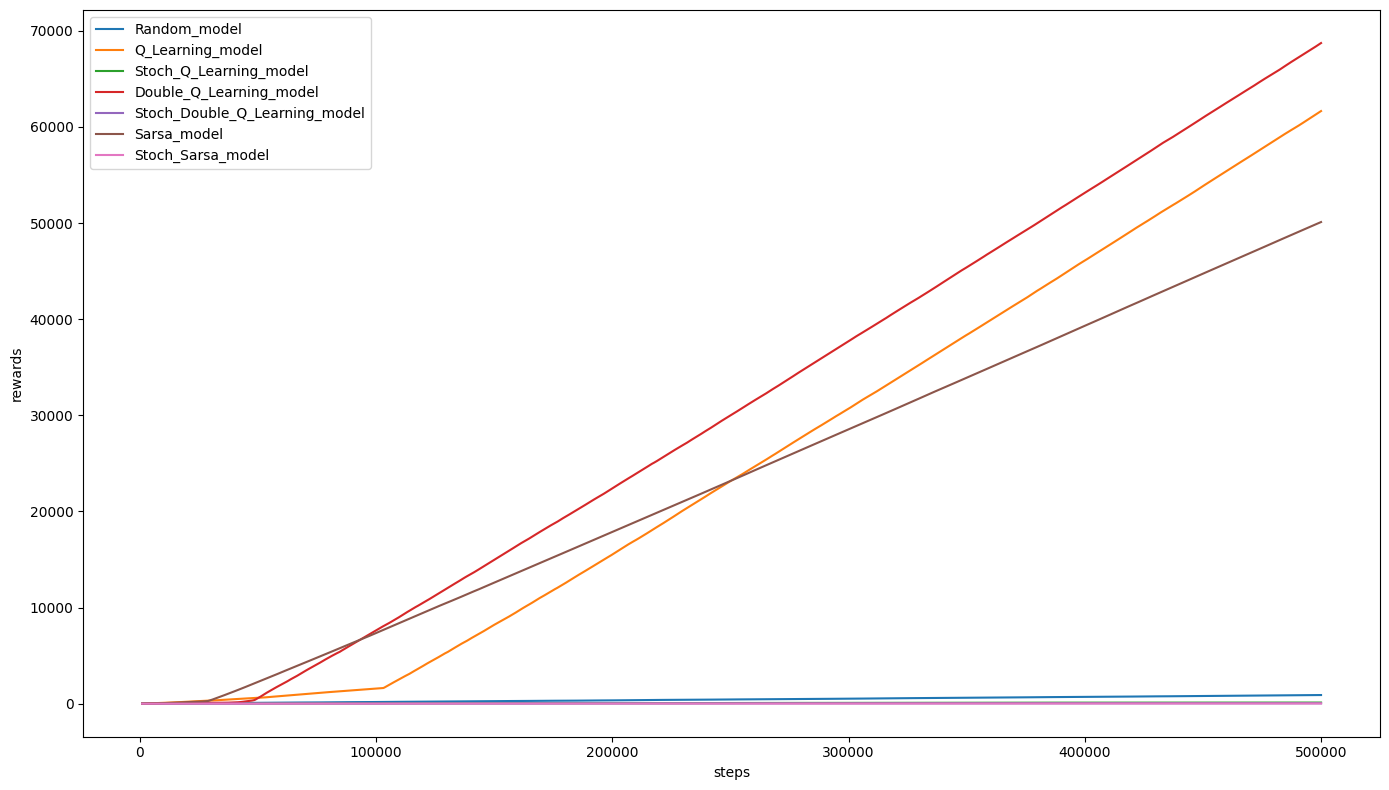

In [34]:
one_plot_1(avg_acu_rewards,models_name,1000)

/Users/tarikelkhoury/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


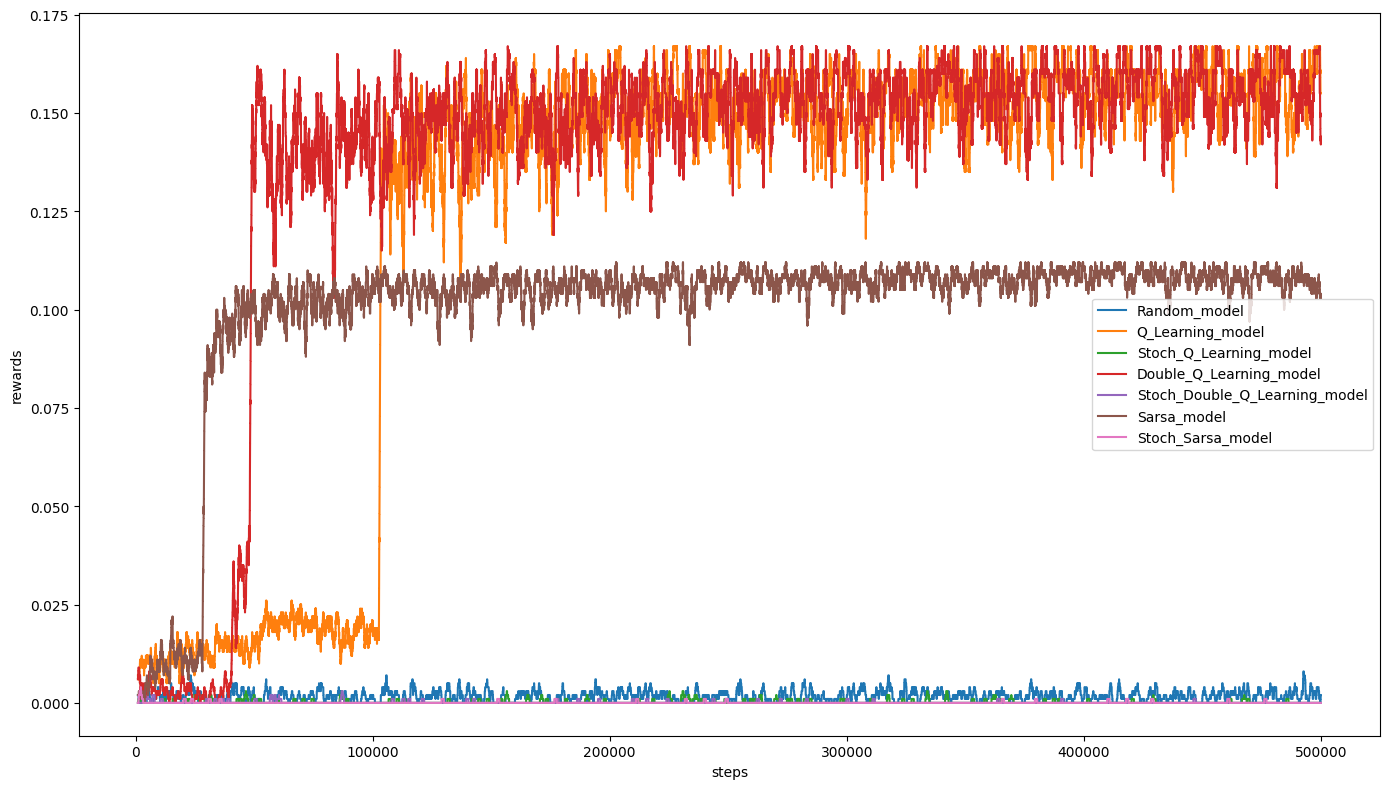

In [19]:
one_plot_1(avg_rewards,models_name,1000)